In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd

from math import e, log
plt.style.use('seaborn-v0_8-whitegrid')

<div>
    <h1> Logistic regression </h1>
<img src="img/logistic-regression-1.jpeg" alt="Drawing" style="height: 500px;"/>
<img src="img/logistic-regression-2.jpeg" alt="Drawing" style="height: 500px;"/>
</div>

## Step 1 Dummy data generation

In [2]:
n_features = 2
X, y = make_blobs(n_samples=2000, n_features=n_features, shuffle=False, cluster_std=1, centers=2, random_state=0)
print(f'Input shape {X.shape}, Output shape {y.shape}')

Input shape (2000, 2), Output shape (2000,)


In [3]:
pd.DataFrame(X).head()

,0,1
0,2.843828,3.326509
1,1.926358,4.152430
2,0.873051,4.714386
3,1.120314,5.758061
4,1.737308,4.425462


In [4]:
y

array([0, 0, 0, ..., 1, 1, 1])

## Step 2 Data Visualization

In [5]:
def visualize(X, y, title=''):
    plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow')
    plt.title(title)
    plt.show()

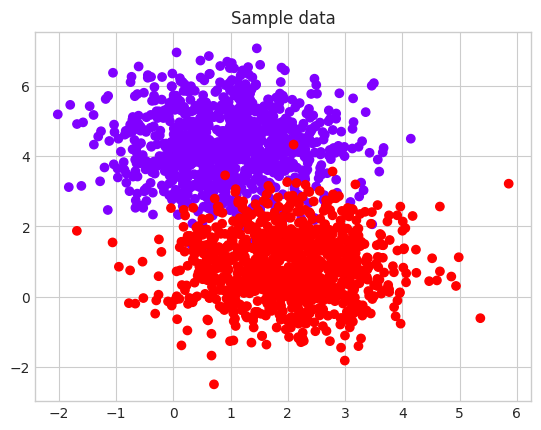

In [6]:
visualize(X, y, 'Sample data')

## Step 3 Data Normalization

In [7]:
def normalize(X):
    u = X.mean(axis=0)
    std = X.std(axis=0)
    return (X-u)/std

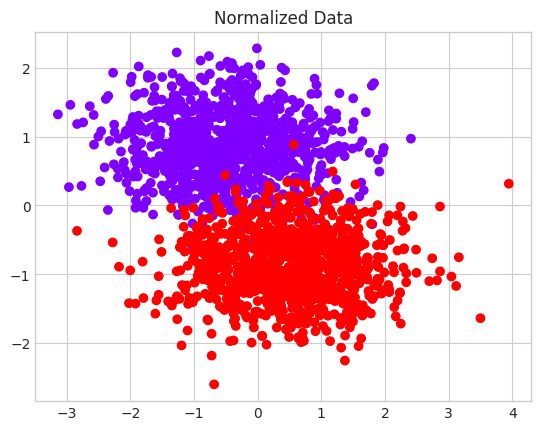

In [8]:
X = normalize(X)
visualize(X, y, 'Normalized Data')

## Step 4 Train test split

In [9]:
XT, Xt, yT, yt = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=36)
print(f'Training size: Input {XT.shape}, Output {yT.shape}')
print(f'Testing size: Input {Xt.shape}, Output {yt.shape}')

Training size: Input (1600, 2), Output (1600,)
Testing size: Input (400, 2), Output (400,)


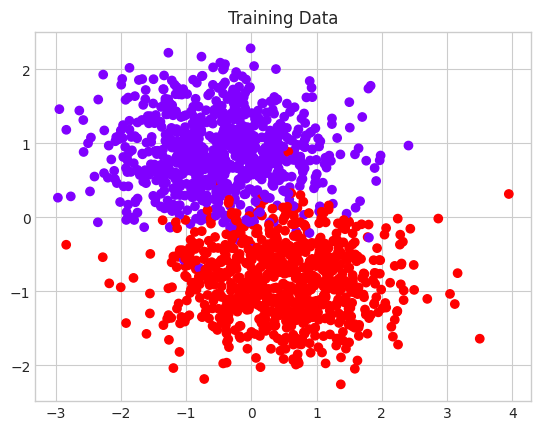

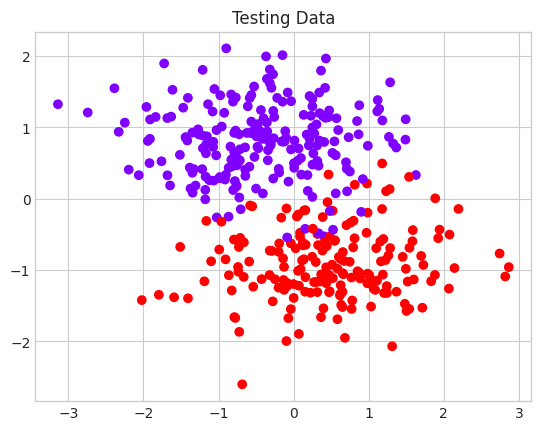

In [10]:
visualize(XT, yT, 'Training Data')
visualize(Xt, yt, 'Testing Data')

## Step 5 Pre-processing - adding extra column in input

In [11]:
def pre_process(X):
    if X.shape[1] == (n_features+1):
        return X
    ones = np.ones((X.shape[0],1))
    return np.hstack((ones, X))
    

In [12]:
XT = pre_process(XT)
Xt = pre_process(Xt)
print(f"After preprocessing: Training input shape - {XT.shape}, Testing input shape - {Xt.shape}")

After preprocessing: Training input shape - (1600, 3), Testing input shape - (400, 3)


In [13]:
pd.DataFrame(XT).head()

,0,1,2
0,1.0,0.351809,1.626389
1,1.0,-1.540567,0.717583
2,1.0,-0.031145,1.016488
3,1.0,0.898634,-0.968713
4,1.0,-0.950859,-1.321636


## Step 6 Modelling

In [23]:
def sigmoid(z):
    return 1/(1+e**(-z))


def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))


def error(X, theta, y):
    yp = hypothesis(X, theta)
    m = X.shape[0]
    return -np.mean(y*np.log(yp) + (1-y)*np.log(1-yp))


def gradient(X, theta, y):
    yp = hypothesis(X, theta)
    m = X.shape[0]
    return (-1/m)*(np.dot(X.T, (y-yp)))


def predict(X, theta):
    h = hypothesis(X, theta)
    yp = np.zeros((X.shape[0],))
    yp[h >= 0.5] = 1
    return yp


def accuracy(X, theta, y):
    yp = predict(X, theta)
    return (yp == y).sum()/X.shape[0]*100

In [15]:
def train(X, y, n_iters = 100, l_rate = 0.1):
    err_list = []
    theta = np.random.randn(X.shape[1])
    for i in range(n_iters):
        err_list.append(error(X, theta, y))
        theta = theta - l_rate*gradient(X, theta, y)
    return theta, err_list
        

## Step 7 Training the model

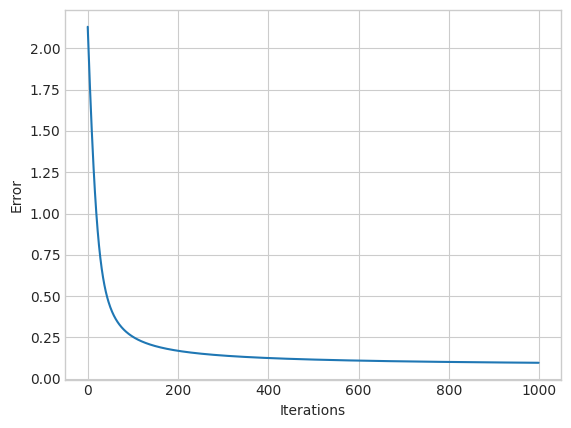

In [16]:
theta, errs = train(XT, yT, n_iters = 1000)
plt.plot(errs)
plt.ylabel('Error')
plt.xlabel('Iterations')
plt.show()

## Step 8 Testing the model and visualizing it

In [17]:
def r2_score(yp, y):
    num = np.sum((yp-y)**2)
    denom = np.sum((np.mean(y)-y)**2)
    return 1-num/denom

In [25]:
yp = predict(Xt, theta)
print(f'R2 score - {r2_score(yp, yt)} Accuracy - {accuracy(Xt, theta, yt)}%')

R2 score - 0.8289049919484701 Accuracy - 95.75%


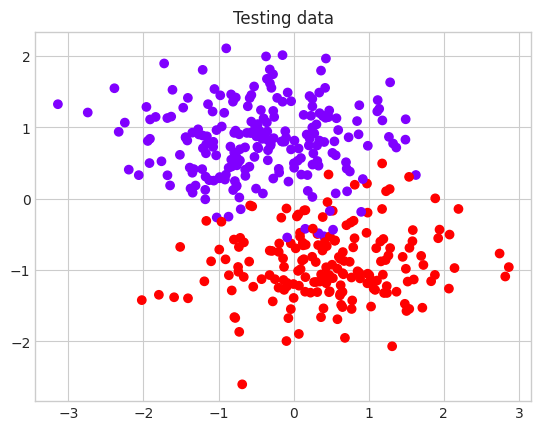

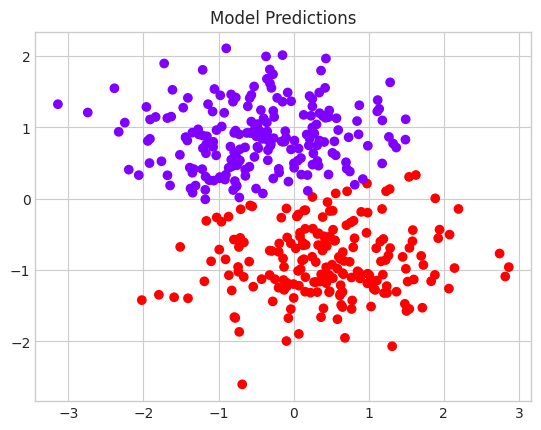

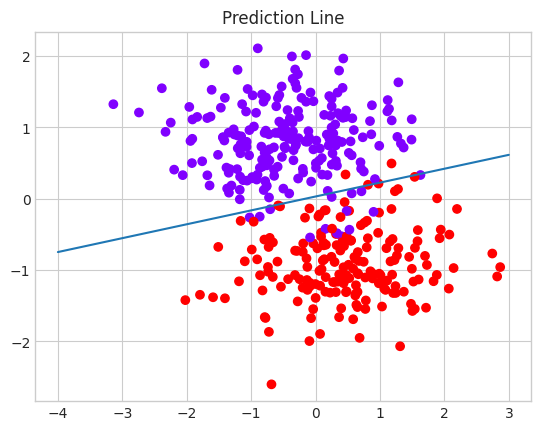

In [22]:
visualize(Xt[:, 1:], yt, 'Testing data')
visualize(Xt[:, 1:], yp, 'Model Predictions')

plt.scatter(Xt[:,1], Xt[:,2], c=yt, cmap='rainbow')
plt.title('Prediction Line')
prediction_line_x = np.arange(-4, 4, 1)
prediction_line_y = -(theta[0]+theta[1]*prediction_line_x)/theta[2]
plt.plot(prediction_line_x, prediction_line_y)
plt.show()

# Logistic Regression using sk-learn library

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(XT, yT)

LogisticRegression()

In [28]:
model.predict(Xt)

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [29]:
model.score(Xt, yt)

0.955

## Multiclass Classification
For multiclass classification there are 2 strategies
1. One vs Rest - for n classes, train n models, choose the class on the basis of max value. For eg, for a,b,c classes, train 3 models for a vs rest, b vs rest, c vs rest, then while predicting get value from all 3 classifiers and choose the class for which we get the maximum value
3. One vs One - for n classes, train nC2 models for eg, for a,b,c classes train a vs b, a vs c, b vs c and then take predictions from all the models, choose the class on the basis of max occurences. If 2 classifiers predict b and 1 predicts c, choose b

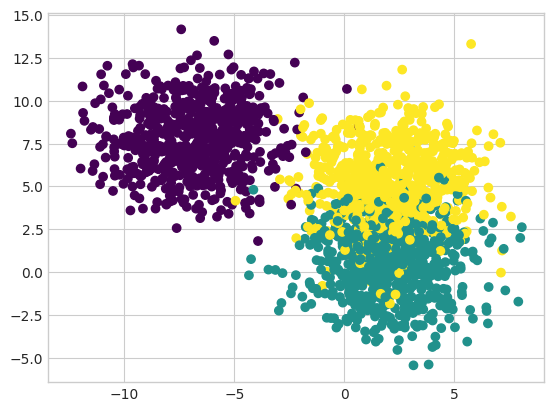

In [34]:
X, y = make_blobs(n_samples=2000, n_features=2, centers=3, cluster_std=2)

plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')

In [36]:
model2 = LogisticRegression(multi_class='ovr')
model2.fit(X, y)

/home/rajchandvaniya/projects/machine-learning/machine-learning-venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [37]:
model2.score(X,y)

0.907

In [39]:
model2.predict(X)

array([1, 0, 0, ..., 1, 2, 1])